<a href="https://colab.research.google.com/github/404isabel/03MAIR-Algoritmos-de-optimizacion/blob/master/SEMINARIO/Seminario_Isabel_Vazquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   Isabel Vázquez Trigás<br>
Url: https://github.com/404isabel/03MAIR-Algoritmos-de-optimizacion/tree/master/SEMINARIO<br>
Problema:

>3. Combinar cifras y operaciones

Descripción del problema:

El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.

• Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las
operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)

• Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad
dada. Un ejemplo sería para obtener el 2:

4+2-6/3*2 = 2

• Debe analizarse el problema para encontrar soluciones a todos los valores enteros posibles
planteando las siguientes cuestiones:

- ¿Qué valor máximo y mínimo a priori se pueden obtener según las condiciones?

- ¿Es posible encontrar todos los valores posibles entre dicho mínimo y máximo ?


(*) La respuesta es obligatoria


Valor máximo:77
Valor mínimo:1

Explicación

 Siempre voy a poder obtener un resultado para +*-/
 
 a+b*c-d/e
  
  Se traduce en x1+x2-x3
  
  x1 (a) entre [1,9]
  
  x2 (b x c) entre [2,72] (1x2) , (9 x 8)
  
  x3 (d/e) entre [2,9] (2/1), (9/1)
  
 Para obtener el máximo valor posible a obtener:
 
 Si x2 es 72 (9*8),
  
  entonces máximo valor posible de x1=7 y valor mínimo de x3=1 --> 7+72-2=77
  
  
  En cuanto al mínimo:
  
  Si maximizamos x3 a 9, entonces x3=9/1, por lo que el menor valor para x2, es 6 (2*3), lo que nos deja un valor de 4 para x1
  
  Por ello, observamos que el menor valor posible es 1
  
  
  4+2*3-9/1



##### Se puede obtener un resultado para todo el rango de números enteros: [1,77]

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?


Respuesta

##### Teniendo en cuenta las restricciones:

Vmn(9,5) * 4! 

Posibilidades para los números: 9!/(9-5)! = 15120

Posibilidades para los signos: 4! = 24

Posibilidades totales, teniendo en cuenta las restricciones: 15120*24 = 362880

<br><br>



Por otro lado, si tenemos en cuenta que siempre vamos a obtener una solución para el órden de operadores (+,*,-,/), sólo hay que tener en cuenta para el cálculo las posibilidades para los números:
 
Posibilidades totales: 15120


##### Si tener en cuenta las restricciones:
 Suponiendo que podemos repetir tanto números como operadores:
 
Posiblidades para los operadores:4^4 = 246

Posibilidades para los números: 9^5 = 59049
 
 Posibilidades totales: 246*59049 = 14526054
 
 





Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

La mejor estructura de datos que se adapta al problema es:

- Un array de todos los números posibles, ordenados de menor a mayor 
NUMEROS=[1,2,3,4,5,6,7,8,9]

- Un array con todos los posibles operadores. 
OPERADORES=["+","*","-","/"]

Para el primer algoritmo de fuerza bruta que implemento, el órden de los operadores es irrelevante, sin embargo, para el siguiente algoritmo, necesito que vengan en el órden: +,*,-,/ (ya que éste es el órden que siempre me va a proporcionar un resultado para cualquier caso, y en la definición del problema se quiere encontrar una solución, no todas). Este orden me permite reducir el número de operaciones.



In [0]:
NUMEROS=[1,2,3,4,5,6,7,8,9]
OPERADORES=["+","*","-","/"] 

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

- Función objetivo: La función objetivo evalua cómo de alejados estamos del valor objetivo.  El valor objetivo es aquella función formada por 5 números y 4 operadores, para la cual se cumple que al evaluarla se obtiene un número dado. Es decir, la función objetivo será: a+b*c-d/e. Por cada conjunto obtenido (a,b,c,d,e) se evaluará si se tiene como resultado el número pasado como parámetro.

- El problema no es de maximización ni de minimización, se trata de obtener una expresión en concreto que obtenga un número dado.  

In [0]:
def obtenerExpresion(expresion,num):
  #Se comprueba que la longitud sea 9 y que la función eval de python nos retorne el número
  if len(expresion)==9 and eval(expresion)==num: 
    print("Solución "+ expresion)
  else:
    print("No es solución")

#Ejemplos
obtenerExpresion("1+2*5-9/3",8)
obtenerExpresion("1+2*4-8/5",8)

Solución 1+2*5-9/3
No es solución


Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [1]:
from time import time
GUARDAR_RESULTADO=False
TIEMPOS=[]
def calcular_tiempo(f):
   
    def wrapper(*args, **kwargs):        
        inicio = time()       
        resultado = f(*args, **kwargs)       
        tiempo = float(time() - inicio)     
        print("\r\n Tiempo de ejecución para algoritmo: "+"{0:.25f}".format(tiempo)+"\r\n")
        if GUARDAR_RESULTADO==True:
          TIEMPOS.append(tiempo)
        return resultado
    
    return wrapper
  
### Precondiciones:

#Valor mínimo a obtener: 1
expresionMinima="9/3*2-6+1"
print("Valor mínimo posible a obtener "+str(int(eval(expresionMinima))))
#Valor máximo a obtener: 77
expresionMaxima="7+8*9/1-2"
#expresionMaxima="8*9+7/1-2"
print("Valor máximo posible a obtener "+str(int(eval(expresionMaxima))))
#Se le da prioridad al * y / (izquierda a derecha) frente a + y -

MINIMO=1
MAXIMO=77
NUMEROS=[1,2,3,4,5,6,7,8,9]
OPERADORES=["+","*","-","/"]
#Con cualquier órden de operaciones, este algoritmo funciona
#OPERACIONES=["+","-","*","/"]



def obtenerEnteroFB(num,ENTEROS,OPERACIONES):   
    a=0
    b=0
    c=0
    d=0
    e=0
    o1=""
    o2=""
    o3=""
    o4=""
   
    for e1 in ENTEROS:           
      a=e1      
      for op1 in OPERACIONES:
        o1=op1
        for e2 in ENTEROS:
          if(e2!=e1):
            b=e2
            for op2 in OPERACIONES:
              if(op2!=op1):
                o2=op2
                for e3 in ENTEROS:
                    if(e3!=e1 and e3!=e2):
                      c=e3
                      for op3 in OPERACIONES:
                        if(op3!=op2 and op3!=op1):
                          o3=op3
                          for e4 in ENTEROS:
                            if(e4!=e3 and e4!=e2 and e4!=e1):
                              d=e4
                              for op4 in OPERACIONES:
                                if(op4!=op3 and op4!=op2 and op4!=op1):
                                  o4=op4
                                  for e5 in ENTEROS:
                                    if(e5!=e4 and e5!=e3 and e5!=e2 and e5!=e1):
                                      e=e5
                                      expresion=str(a)+str(o1)+str(b)+str(o2)+str(c)+str(o3)+str(d)+str(o4)+str(e)
                                      if(eval(expresion)==num):
                                        #print(str(expresion))
                                        return expresion                                         

                                      
@calcular_tiempo                                      
def obtenerEnteroFBPintar(num,ENTEROS,OPERACIONES):
  
  resultado=obtenerEnteroFB(num,ENTEROS,OPERACIONES)
  if resultado == None:
    print("No se puede obtener un valor para "+str(num)+" debido a que no está etre el máximo y el mínimo de la función para los datos de entrada")
  else:    
    print("Resultado para lista de "+str(len(ENTEROS))+ " elementos, para el número: "+str(num)+" :"+str(resultado))

print("\r\n")
obtenerEnteroFBPintar(78,NUMEROS,OPERADORES)
obtenerEnteroFBPintar(1,NUMEROS,OPERADORES)
obtenerEnteroFBPintar(8,NUMEROS,OPERADORES)
obtenerEnteroFBPintar(40,NUMEROS,OPERADORES)
obtenerEnteroFBPintar(77,NUMEROS,OPERADORES)



Valor mínimo posible a obtener 1
Valor máximo posible a obtener 77


No se puede obtener un valor para 78 debido a que no está etre el máximo y el mínimo de la función para los datos de entrada

 Tiempo de ejecución para algoritmo: 3.2331640720367431640625000

Resultado para lista de 9 elementos, para el número: 1 :1+2*6/3-4

 Tiempo de ejecución para algoritmo: 0.0020067691802978515625000

Resultado para lista de 9 elementos, para el número: 8 :1+2*5-9/3

 Tiempo de ejecución para algoritmo: 0.0017354488372802734375000

Resultado para lista de 9 elementos, para el número: 40 :1+6*7-9/3

 Tiempo de ejecución para algoritmo: 0.0465877056121826171875000

Resultado para lista de 9 elementos, para el número: 77 :7+8*9-2/1

 Tiempo de ejecución para algoritmo: 2.1830410957336425781250000



Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

El algoritmo de fuerza bruta tiene la siguiente complejidad:    O(n^9) (orden polinómico)  

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

##### Se implementa algoritmo basado en el concepto de ramificación y poda (en profundidad). 

Este algoritmo mejora con respecto al algoritmo de fuerza bruta debido a los siguientes motivos:<br><br>

Mejora en complejidad, debido a que este algoritmo tiene en cuenta que siempre existe una solución para el órden de operadores (+,*,-,/). Por ese motivo, no se van a comprobar otros posibles órdenes, esto hace que pasemos de 9 bucles a 5.<br><br>

El algoritmo implementado, se trata de un algoritmo basado en el concepto de ramificación y poda. Es un algoritmo iterativo (no recursivo)  que va iterando a través de todos los nodos, y evaluando condiciones en todos los niveles para poder podar aquellos nodos que no nos van a conducir a una solución (y así no evaluarlos). De este modo evitamos tener que recorrer todos y cada uno de los nodos, resultando en una reducción significativa del total de las operaciones.<br><br>

Para los datos del problema (números del 1 al 9), se aprecian reducciones de tiempos, pero, además, si ampliamos el tamaño de la lista de números se puede observar con más claridad que las mejoras son muy importantes. Para más información, ir al último apartado de este documento, donde se pueden ver comparativas.<br><br>

Las explicaciones de cómo funciona el algoritmo se pueden seguir en los comentarios del código. 



In [2]:
#Algoritmo similar a ramificación y poda (5 nodos)

def esPrometedoraNodo2(x2,j,NUMEROS):  
  return (x2%j==0 and x2/j!=j and x2/j<=len(NUMEROS) and x2/j>0)

#El nodo 4 no es prometedor si es imposible que para x1+x2-x3 pueda obtener un resultado <=num
def esPrometedoraNodo4(a,b,c,num,OPERADORES,NUMEROS):
  maximoX3=len(NUMEROS) #Lo máximo que voy a poder restar (d/e)
  resultado=eval(str(a)+OPERADORES[0]+str(b)+OPERADORES[1]+str(c)+OPERADORES[2]+str(maximoX3))
  return resultado<=num

def esPrometedoraNodo5(l,p):#El resultado de la división tiene que ser un entero
  return (l%p==0)


def calculoExpr(x2,num,NUMEROS):
  #x2: divido x2 entre 1,2,3,4.... siempre y cuando el resto sea 0, si fueran iguales, ej: 3*3, descarto esa posibilidad
  for j in NUMEROS:    
      if esPrometedoraNodo2(x2,j,NUMEROS):#Nodo 2: Podo esta rama, si la rama no es prometedora
        #Se obtienen a la vez b y c (que son el resultado de una multiplicación)
        b=int(x2/j)       
        c=j
        for k in NUMEROS:
          if(k!=b and k!=c):#Nodo 3: Podo esta rama, si no cumplo las condiciones (este nodo hará referencia al valor de a)
            a=k   
            for l in NUMEROS:            
              if l!=a and l!=b and l!=c and esPrometedoraNodo4(a,b,c,num,OPERADORES,NUMEROS):#Nodo 4: Podo esta rama, si no es prometedora (hace referencia a d)
                hasta=int(len(NUMEROS)/2)+1             
                for p in range(1,hasta): #No tiene sentido calcular todos los valores para e, sólo aquellos para los que pueda obtener de la división un valor entero
                  if (esPrometedoraNodo5(l,p) and p!=a and p!=b and p!=c and p!=l):#Nodo 5: Podo esta rama, si la rama no es prometedora (hace referencia a e)              
                    d=l                  
                    e=p                  
                    expresion=str(a)+OPERADORES[0]+str(b)+OPERADORES[1]+str(c)+OPERADORES[2]+str(d)+OPERADORES[3]+str(e)                  
                    if(eval(expresion)==num):
                      return expresion
  

def calculoSimple(num,NUMEROS):
  #Tal y como hemos podido ver en el enunciado, siempre voy a poder obtener un resultado para +*-/
  #a+b*c-d/e
  
  #Se traduce en x1+x2-x3
  #x1 entre [1,9]  a
  #x2 entre [2,72] (9*8) b*c
  #x3 entre [2,9] d/e
  
  #x2+(x1-x3)=num
  
  #Por ello el mayor valor posible es 77, ya que si x2 es 72, 
  #entonces máximo valor posible de x1=7 y valor mínimo de x3=1 --> 7+72-2=77
  
  #Al final, todo se puede simplificar en :
  #x-8=num --> x=num+8
  #x+7=num --> x=num-7
  
  
  
  #Si queremos generalizar los cálculos obtenemos que:
  #x1 entre [min,max] a
  #x2 entre [min+1,max*(max-1)]
  #x3 entre [min+1,max]
  
  #x=num+(max-1)
  #x=num-(max+2)
 
  for i in range(0,len(NUMEROS)-1):#Nodo 1 (empiezo calculando x2 para b y c)
    x2=num+i
    x2prima=num-i
    #Buscar soluciones, partiendo de x2 (si no se obtienen soluciones, buscar a partir de x2prima)      
    exp=calculoExpr(x2,num,NUMEROS)
    if exp==None:      
      exp2=calculoExpr(x2prima,num,NUMEROS)
      if(exp2!=None):        
        return exp2        
    else:
      return exp
  
    

@calcular_tiempo                                      
def calculoSimplePintar(num,NUMEROS):
  
  resultado=calculoSimple(num,NUMEROS)
  if resultado == None:    
    print("No se puede obtener un valor para "+str(num)+" debido a que no está etre el máximo y el mínimo de la función para los datos de entrada")
  else:    
    print("Resultado para lista de "+str(len(NUMEROS))+ " elementos, para el número: "+str(num)+" :"+str(resultado))

print("\r\n")
   
calculoSimplePintar(78,NUMEROS)
calculoSimplePintar(1,NUMEROS)
calculoSimplePintar(8,NUMEROS)
calculoSimplePintar(40,NUMEROS)
calculoSimplePintar(77,NUMEROS)




No se puede obtener un valor para 78 debido a que no está etre el máximo y el mínimo de la función para los datos de entrada

 Tiempo de ejecución para algoritmo: 0.0016801357269287109375000

Resultado para lista de 9 elementos, para el número: 1 :4+3*2-9/1

 Tiempo de ejecución para algoritmo: 0.0041751861572265625000000

Resultado para lista de 9 elementos, para el número: 8 :2+8*1-6/3

 Tiempo de ejecución para algoritmo: 0.0006337165832519531250000

Resultado para lista de 9 elementos, para el número: 40 :2+8*5-6/3

 Tiempo de ejecución para algoritmo: 0.0004460811614990234375000

Resultado para lista de 9 elementos, para el número: 77 :7+9*8-2/1

 Tiempo de ejecución para algoritmo: 0.0008919239044189453125000



(*)Calcula la complejidad del algoritmo 

Respuesta


Complejidad del algoritmo: O(n^5) (orden polinómico)


##### Además del algoritmo de fuerza bruta y ramificación y poda, he diseñado otro algoritmo de fuerza bruta que tiene en cuenta  el órden de los operadores (+,*,-,/)
Con este algoritmo, quería comprobar que las mejoras del algoritmo de ramificación y poda no sólo eran debidas a la reducción de la complejidad, sino a las comprobaciones efectuadas en cada nodo. A continuación, éste es el tercer algoritmo de prueba que he creado.
Este algoritmo tiene también orden O(n^5).  En el último apartado de este documento se pueden ver las pruebas efectuadas.

In [0]:
#Algoritmo de fuerza bruta, para el cual sólo tengo en cuenta el órden (+*-/), ya que este órden siempre nos va a devolver un resultado
#Con este algoritmo se observan mejoras, ya que se reduce la complejidad del mismo

def obtenerEnteroFBRest(num,ENTEROS,OPERACIONES):   
    a=0
    b=0
    c=0
    d=0
    e=0
    o1=""
    o2=""
    o3=""
    o4=""
   
    for e1 in ENTEROS:           
      a=e1
      o1="+"
      for e2 in ENTEROS:
          if(e2!=e1):
            b=e2
            o2="*"
            for e3 in ENTEROS:
              if(e3!=e1 and e3!=e2):
                  c=e3
                  o3="-"
                  for e4 in ENTEROS:
                    if(e4!=e3 and e4!=e2 and e4!=e1):                      
                      d=e4
                      o4="/"
                      for e5 in ENTEROS:
                        if(e5!=e4 and e5!=e3 and e5!=e2 and e5!=e1):
                            e=e5
                            expresion=str(a)+str(o1)+str(b)+str(o2)+str(c)+str(o3)+str(d)+str(o4)+str(e)
                            if(eval(expresion)==num):
                              return expresion                                         

                                      
@calcular_tiempo                                      
def obtenerEnteroFBRestPintar(num,ENTEROS,OPERACIONES):
  
  resultado=obtenerEnteroFBRest(num,ENTEROS,OPERACIONES)
  if resultado == None:
    print("No se puede obtener un valor para "+str(num)+" debido a que no está etre el máximo y el mínimo de la función para los datos de entrada")
  else:    
    print("Resultado para lista de "+str(len(ENTEROS))+ " elementos, para el número: "+str(num)+" :"+str(resultado))

print("\r\n")
obtenerEnteroFBRestPintar(78,NUMEROS,OPERADORES)
obtenerEnteroFBRestPintar(1,NUMEROS,OPERADORES)
obtenerEnteroFBRestPintar(8,NUMEROS,OPERADORES)
obtenerEnteroFBRestPintar(40,NUMEROS,OPERADORES)
obtenerEnteroFBRestPintar(77,NUMEROS,OPERADORES)



No se puede obtener un valor para 78 debido a que no está etre el máximo y el mínimo de la función para los datos de entrada

 Tiempo de ejecución para algoritmo: 0.1535522937774658203125000

Resultado para lista de 9 elementos, para el número: 1 :4+2*3-9/1

 Tiempo de ejecución para algoritmo: 0.0501840114593505859375000

Resultado para lista de 9 elementos, para el número: 8 :1+2*5-9/3

 Tiempo de ejecución para algoritmo: 0.0008931159973144531250000

Resultado para lista de 9 elementos, para el número: 40 :1+6*7-9/3

 Tiempo de ejecución para algoritmo: 0.0103709697723388671875000

Resultado para lista de 9 elementos, para el número: 77 :7+8*9-2/1

 Tiempo de ejecución para algoritmo: 0.1136147975921630859375000



Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [0]:
# En principio, según la descripción del problema, no tiene sentido generar datos aleatorios para los operadores
# En cuanto a los números, atendiendo a las restricciones del problema tampoco tiene cabida generar números aleatorios, ya que sólo son 77, y podemos probarlos todos.
# Pero, tal y como he implementado el algoritmo sí que puedo generar listas variables en tamaño. (Para esa lista de gran tamaño, genero números aleatorios)

import random

#Lista de números a probar con todos los datos de la definición del problema [1,77]
lista1=[x for x in range(1,77)]
numerosDefinicion=[1,2,3,4,5,6,7,8,9]
#Para una lista de números de gran tamaño, creo un juego de datos aleatorios, comprendidos entre los valores 1,2000
numerosListaGrande=[x for x in range(1,2356)]
lista2=[]
for i in range(10):
  lista2.append(random.randint(1,len(numerosListaGrande)))
print(lista2)  

[1944, 1864, 613, 1881, 1565, 867, 1378, 238, 999, 579]


Aplica el algoritmo al juego de datos generado

Respuesta

In [0]:
#Cálculo de todos los números posibles según la definición inicial del problema
for i in lista1:
  calculoSimplePintar(i,numerosDefinicion)

Resultado para lista de 9 elementos, para el número: 1 :4+3*2-9/1

 Tiempo de ejecución para algoritmo: 0.0070021152496337890625000

Resultado para lista de 9 elementos, para el número: 2 :4+3*2-8/1

 Tiempo de ejecución para algoritmo: 0.0136094093322753906250000

Resultado para lista de 9 elementos, para el número: 3 :2+3*1-8/4

 Tiempo de ejecución para algoritmo: 0.0001051425933837890625000

Resultado para lista de 9 elementos, para el número: 4 :2+4*1-6/3

 Tiempo de ejecución para algoritmo: 0.0003366470336914062500000

Resultado para lista de 9 elementos, para el número: 5 :2+5*1-6/3

 Tiempo de ejecución para algoritmo: 0.0002329349517822265625000

Resultado para lista de 9 elementos, para el número: 6 :2+6*1-8/4

 Tiempo de ejecución para algoritmo: 0.0001134872436523437500000

Resultado para lista de 9 elementos, para el número: 7 :2+7*1-6/3

 Tiempo de ejecución para algoritmo: 0.0005068778991699218750000

Resultado para lista de 9 elementos, para el número: 8 :2+8*1-6/3

 T

In [0]:
#Cálculo de todos los números posibles para la lista aleatoria de números generada
for i in lista2:
  calculoSimplePintar(i,numerosListaGrande)

Resultado para lista de 2355 elementos, para el número: 1944 :2+1944*1-6/3

 Tiempo de ejecución para algoritmo: 0.0022113323211669921875000

Resultado para lista de 2355 elementos, para el número: 1864 :2+1864*1-6/3

 Tiempo de ejecución para algoritmo: 0.0021052360534667968750000

Resultado para lista de 2355 elementos, para el número: 613 :2+613*1-6/3

 Tiempo de ejecución para algoritmo: 0.0010566711425781250000000

Resultado para lista de 2355 elementos, para el número: 1881 :2+1881*1-6/3

 Tiempo de ejecución para algoritmo: 0.0009765625000000000000000

Resultado para lista de 2355 elementos, para el número: 1565 :2+1565*1-6/3

 Tiempo de ejecución para algoritmo: 0.0019094944000244140625000

Resultado para lista de 2355 elementos, para el número: 867 :2+867*1-6/3

 Tiempo de ejecución para algoritmo: 0.0012164115905761718750000

Resultado para lista de 2355 elementos, para el número: 1378 :2+1378*1-6/3

 Tiempo de ejecución para algoritmo: 0.0010905265808105468750000

Resultado 

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

Se podría avanzar en el estudio de este problema en los siguientes aspectos:

- Obteniendo no una solución, sino todas las posibles
- Agregando más operadores, ejemplo: raíces cuadradas y potencias
- Eliminando restricciones al problema:

  -  Con números que se puedan repetir
  - Con operadores que se puedan repetir
  - Con un rango numérico más amplio (no sólo 1 a 9)
  
  Este último aspecto (rango numérico más amplio) ya se ha tenido en cuenta en todos los algoritmos que he implementado.
  
  A continuación, voy a mostrar los resultados obtenidos de utilizar dichos algoritmos para distintas entradas de datos.
  Se va a poder observar cómo el algoritmo implementado es muy superior a los dos algoritmos de fuerza bruta.

In [0]:
#En el algoritmo que he implementado, ya contemplo rangos numéricos más amplios, no necesariamente desde 1 a 9
#Se muestran a continuación los resultados obtenidos para distintos números y diferente rango numérico, no sólo el tamaño sino para diferentes rangos
print("###### Algoritmo de calculoSimple")
lista=[x for x in range(1,5000)]  
calculoSimplePintar(232,lista)

lista=[x for x in range(200,5000)]  
calculoSimplePintar(232,lista)

lista=[x for x in range(23,544)]  
calculoSimplePintar(232,lista)

print("\r\n ###### Algoritmo de fuerza bruta")
#El primer algoritmo por fuerza bruta tarda muchísimo para listas grandes, se queda colgado. Pruebo con una lista de 20 elementos.:
#obtenerEnteroFBRestPintar(232,lista,OPERACIONES)
obtenerEnteroFBPintar(232,[x for x in range(1,20)],OPERACIONES)
print("\r\n ###### Algoritmo de fuerza bruta con restricciones")
#El segundo también se queda colgado con listas tan grandes, aun así, responde  mejor para la lista de 20 elementos
#obtenerEnteroFBRestPintar(232,lista,["OPERACIONES"])
obtenerEnteroFBRestPintar(232,[x for x in range(1,20)],OPERACIONES)
obtenerEnteroFBRestPintar(232,[x for x in range(1,100)],OPERACIONES)


###### Algoritmo de calculoSimple
Resultado para lista de 4999 elementos, para el número: 232 :2+232*1-6/3

 Tiempo de ejecución para algoritmo: 0.0017340183258056640625000

Resultado para lista de 4800 elementos, para el número: 232 :200+1*232-400/2

 Tiempo de ejecución para algoritmo: 0.1278395652770996093750000

Resultado para lista de 521 elementos, para el número: 232 :23+8*29-46/2

 Tiempo de ejecución para algoritmo: 0.0022056102752685546875000


 ###### Algoritmo de fuerza bruta
Resultado para lista de 19 elementos, para el número: 232 :1+13*18-6/2

 Tiempo de ejecución para algoritmo: 2.6643581390380859375000000


 ###### Algoritmo de fuerza bruta con restricciones
Resultado para lista de 19 elementos, para el número: 232 :1+13*18-6/2

 Tiempo de ejecución para algoritmo: 0.4730551242828369140625000

Resultado para lista de 99 elementos, para el número: 232 :1+3*78-6/2

 Tiempo de ejecución para algoritmo: 14.6702048778533935546875000



####GRÁFICOS DE RENDIMIENTO

In [0]:
#Tamaños diversos de listas, de 50 en 50 elementos
listaGrafico=[9,59,109,159,209]

GUARDAR_RESULTADO=True
TIEMPOS=[]

#Fuerza bruta
print("\r\n Fuerza bruta:")
for i in(listaGrafico):
  obtenerEnteroFBPintar(45,[x for x in range(1,i+1)],OPERACIONES)
tiemposFuerzaBruta=[]
for j in TIEMPOS:
  tiemposFuerzaBruta.append(j) 
TIEMPOS=[]  

#Fuerza bruta restricciones
print("\r\n Fuerza bruta con restricciones:")
for i in(listaGrafico):
  obtenerEnteroFBRestPintar(45,[x for x in range(1,i+1)],OPERACIONES)    
tiemposFuerzaBrutaR=[]
for k in TIEMPOS:
  tiemposFuerzaBrutaR.append(k) 
TIEMPOS=[] 
 

#Cálculo simple
print("Cálculo simple:")
for i in(listaGrafico):
  calculoSimplePintar(45,[x for x in range(1,i+1)])
tiemposCalculoSimple=[]
for l in TIEMPOS:
  tiemposCalculoSimple.append(l)
TIEMPOS=[]  

GUARDAR_RESULTADO=False


 Fuerza bruta:
Resultado para lista de 9 elementos, para el número: 45 :2+5*9-6/3

 Tiempo de ejecución para algoritmo: 0.4433450698852539062500000

Resultado para lista de 59 elementos, para el número: 45 :1+2*23-6/3

 Tiempo de ejecución para algoritmo: 1.1779711246490478515625000

Resultado para lista de 109 elementos, para el número: 45 :1+2*23-6/3

 Tiempo de ejecución para algoritmo: 4.2094135284423828125000000

Resultado para lista de 159 elementos, para el número: 45 :1+2*23-6/3

 Tiempo de ejecución para algoritmo: 9.0547308921813964843750000

Resultado para lista de 209 elementos, para el número: 45 :1+2*23-6/3

 Tiempo de ejecución para algoritmo: 15.9337584972381591796875000


 Fuerza bruta con restricciones:
Resultado para lista de 9 elementos, para el número: 45 :2+5*9-6/3

 Tiempo de ejecución para algoritmo: 0.0238971710205078125000000

Resultado para lista de 59 elementos, para el número: 45 :1+2*23-6/3

 Tiempo de ejecución para algoritmo: 0.5827753543853759765625000

#### Gráficos de rendimiento para los tres algoritmos

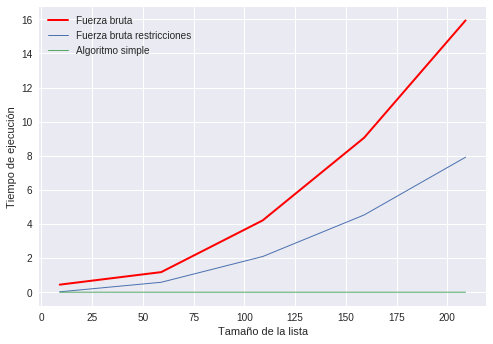

In [0]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(1,1) 
axis.plot(listaGrafico,tiemposFuerzaBruta,'r',label='Fuerza bruta',linewidth=2) 
axis.plot(listaGrafico,tiemposFuerzaBrutaR,label='Fuerza bruta restricciones',linewidth=1)
axis.plot(listaGrafico,tiemposCalculoSimple,label='Algoritmo simple',linewidth=1)
axis.legend(loc='best') 
axis.set_xlabel('Tamaño de la lista')  
axis.set_ylabel('Tiempo de ejecución') 
plt.show() # Se muestra la figura

Tal y como se aprecia, a medida que aumenta el tamaño de la lista, los tiempos para fuerza bruta y fuerza bruta con restricciones, crecen mucho más que para el algoritmo simple. Esto es debido, tal y como se ha explicado en apartaodos anteriores, a su menor complejidad y menor número de operaciones 

#### Gráfico de rendimiento para algoritmo calculoSimple

In [0]:
TIEMPOS=[] 
GUARDAR_RESULTADO=True
tiemposCalculoSimpleT=[]

calculoSimplePintar(18,[x for x in range(1,10000)])
calculoSimplePintar(180,[x for x in range(1,100000)])
calculoSimplePintar(1809,[x for x in range(1,1000000)])
calculoSimplePintar(18097,[x for x in range(1,10000000)])
calculoSimplePintar(180978,[x for x in range(1,100000000)])

for t in TIEMPOS:
  tiemposCalculoSimpleT.append(t)

TIEMPOS=[] 
GUARDAR_RESULTADO=False

Resultado para lista de 9999 elementos, para el número: 18 :2+18*1-6/3

 Tiempo de ejecución para algoritmo: 0.0043799877166748046875000

Resultado para lista de 99999 elementos, para el número: 180 :2+180*1-6/3

 Tiempo de ejecución para algoritmo: 0.0334365367889404296875000

Resultado para lista de 999999 elementos, para el número: 1809 :2+1809*1-6/3

 Tiempo de ejecución para algoritmo: 0.3126392364501953125000000

Resultado para lista de 9999999 elementos, para el número: 18097 :2+18097*1-6/3

 Tiempo de ejecución para algoritmo: 3.0968182086944580078125000

Resultado para lista de 99999999 elementos, para el número: 180978 :2+180978*1-6/3

 Tiempo de ejecución para algoritmo: 30.1129696369171142578125000



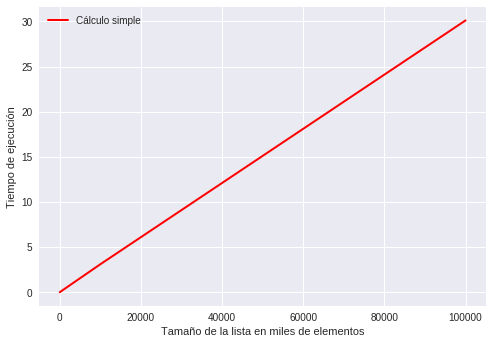

In [0]:
import matplotlib.pyplot as plt
fig,axis = plt.subplots(1,1) 
axis.plot([10000/1000,100000/1000,1000000/1000,10000000/1000,100000000/1000],tiemposCalculoSimpleT,'r',label='Cálculo simple',linewidth=2)
axis.legend(loc='best') 
axis.set_xlabel('Tamaño de la lista en miles de elementos')  
axis.set_ylabel('Tiempo de ejecución')
plt.show() # Se muestra la figura

Se ha hecho un gráfico aparte para calculo simple para tamaños más grandes de listas. El gráfico está puesto en miles de elementos.
Se aprecia un crecimiento lineal, a medida que el número a calcular y el listado de números es mayor.